<div align="center">
    <img src="../Logo/Ahjin_Logo-removebg-preview.png"
         alt="Ahjin Logo"
         style="width:250px; height:250px; border-radius:50%;">
</div>

### AUTHOR: *Norman Mwapea*

# BUSINESS UNDERSTANDING

Telecommunications companies operate in a market where customer loyalty is fragile and switching costs are low. Even small frustrations - billing confusion, inconsistent service, or poor support interactions - can gradually push a customer toward a competitor. Churn does not just reflect dissatisfaction; it represents lost relationships, marketing waste, and the weakening of long-term revenue streams.

Consider a long-time customer who has never complained loudly but has slowly reduced their call usage, contacted customer support more often than usual, and recently started exploring competing offers. Nothing dramatic appears on the surface, but their behavior quietly signals disengagement. For a company like SyriaTel, the challenge is recognizing these patterns before the customer disappears.

This project focuses on developing a machine learning classifier that predicts whether a SyriaTel customer is likely to churn in the near future. By identifying high-risk customers early, the company can act proactively - improving service experiences, offering targeted retention programs, or addressing underlying service issues.

## OBJECTIVES

- **Predict churn**: Build a reliable model that classifies customers as likely or unlikely to churn.
- **Understand drivers of churn**: Identify the features and behaviors most strongly associated with customer loss.
- **Enable targeted interventions**: Equip the business with insights it can use to prioritize retention actions.
- **Improve resource allocation**: Help SyriaTel focus marketing and support efforts where they will have the greatest impact.
- **Reduce revenue leakage**: Minimize losses associated with acquiring new customers by retaining existing ones.

## STAKEHOLDERS

- **Customer Experience Team:** Uses churn insights to resolve pain points and improve satisfaction.
- **Marketing & Retention Teams:** Designs offers, loyalty programs, and personalized campaigns for high-risk customers.
- **Network Operations:** Investigates churn patterns linked to coverage issues, call drops, or network reliability.
- **Executive Leadership:** Evaluates overall churn rate, revenue impact, and long-term customer lifecycle trends.
- **Data Science & Analytics Teams:** Build, validate, deploy, and monitor the churn prediction model.

## SUCCESS METRICS

To determine whether the churn model is genuinely useful to the business, performance will be assessed using:

- **Recall (Sensitivity) on the churn class:** Prioritizes identifying as many soon-to-leave customers as possible (critical in retention).
- **Precision on the churn class:** Avoids excessive false alarms that could waste retention resources.
- **ROC-AUC:** Measures overall ability to discriminate between churners and non-churners.
- **Lift / Gains in the top risk deciles** Evaluates whether the model surfaces high-risk customers more effectively than random targeting.
- **Business impact metric:** Estimated *revenue saved* based on the proportion of correctly identified high-risk customers who can be targeted with retention actions.

Ultimately, success means the model not only performs well statistically but provides actionable, trustworthy insights that help SyriaTel maintain stronger relationships with its customers — ideally long before they reach the point of leaving.


# DATA UNDERSTANDING

The dataset consists of **3,333 customer records** with **21 features** related to telecom usage, customer characteristics, and churn status. 

Below is a summary of all features:

| Column Name                | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| state                      | US state where the customer resides                                         |
| account length             | Number of months the customer has been with the company                     |
| area code                  | Customer's phone area code                                                  |
| phone number               | Unique phone number of the customer                                         |
| international plan         | Whether the customer has an international calling plan           |
| voice mail plan            | Whether the customer has a voicemail plan                        |
| number vmail messages      | Number of voicemail messages recorded                                       |
| total day minutes          | Total minutes used during daytime                                           |
| total day calls            | Number of calls made during daytime                                         |
| total day charge           | Total charges incurred during daytime                                       |
| total eve minutes          | Total minutes used during evening                                           |
| total eve calls            | Number of calls made during evening                                         |
| total eve charge           | Total charges incurred during evening                                       |
| total night minutes        | Total minutes used during night                                             |
| total night calls          | Number of calls made during night                                           |
| total night charge         | Total charges incurred during night                                         |
| total intl minutes         | Total international call minutes                                            |
| total intl calls           | Number of international calls                                               |
| total intl charge          | Total charges incurred for international calls                              |
| customer service calls     | Number of calls made to customer service                                    |
| churn                      | Target variable: whether the customer churned                 |

In [ ]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Mathematical Operations
import math

# Display settings
pd.set_option('display.max_colwidth', None)
from IPython.display import display

#### Now to load the data and print it out.

In [3]:
# Load data
data = pd.read_csv('../Data/SyriaTel Customer Churn.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


##### *Observation:*

The data is consistent from top to bottom.

phone number is a Personal Identification Information (PII). To maintain discretion, it will be dropped.

In [4]:
# Drop PII
data = data.drop(columns=['phone number'])

##### Next, I will carry out a quick Initial Data Exploration (IDE) to get a bird’s-eye view of the dataset - just as you would form first impressions when greeting someone new.

In [5]:
# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Check columns
print('\n'+'--'*46)
print("Columns:")
display(data.columns)

# Check metadata
print('\n'+'--'*46)
print("Metadata Check:")
display(data.info())

# Descriptive statistics
print('\n'+'--'*46)
print("Descriptive Statistics For Numeric Variables:")
display(data.describe().T)

# Categorical Variables
print('\n'+'--'*46)
print("Descriptive Statistics For Categorical Variables:")
display(data.describe(include='object').T)

The dataset has 3333 rows and 20 columns.

--------------------------------------------------------------------------------------------
Columns:


Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')


--------------------------------------------------------------------------------------------
Metadata Check:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-nul

None


--------------------------------------------------------------------------------------------
Descriptive Statistics For Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00



--------------------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
state,3333,51,WV,106
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


##### *Observation:*

- The dataset has 3333 customers and 20 features describing usage, plans, and churn.  
- There are 3 categorical features (state, international plan, voice mail plan) and 1 boolean target (churn). The rest are numeric.  
- Most customers have an account length around 101 months, with some staying as long as 243 months.  
- Daily, evening, and night usage minutes are fairly high, with average day minutes ~180, evening ~201, and night ~201, showing that customers use all time periods extensively.  
- Calls and charges are consistent with minutes — longer usage leads to higher charges.  
- International usage is relatively low (~10 minutes/day on average, 4–5 calls).  
- Most customers make 1–2 calls to customer service, but a few call up to 9 times.  
- Customers are spread across 51 states, with West Virginia (WV) being the largest group.  
- Most customers do not have an international plan (3010/3333) or a voice mail plan (2411/3333).  

##### Now that I understand our data, let's check it's completeness and quality.

In [6]:
# Check and remove duplicates
print("Duplicates:", data.duplicated().sum())

# Check data completeness
print('\n'+'--'*20)
print("Missingness check:")
display(data.isna().sum())

Duplicates: 0

----------------------------------------
Missingness check:


state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

##### *Observation:*

- The dataset has no duplicate rows, indicating each record is unique.  
- There are no missing values in any of the 20 columns.  
- All features are fully populated.  

# EXPLORATORY DATA ANALYSIS (EDA)

##### First, rename the columns so they are more pythonic and easier to work with in code.

In [7]:
# Create rename map
rename_map = {
    'state': 'state',
    'account length': 'account_length',
    'area code': 'area_code',
    'international plan': 'intl_plan',
    'voice mail plan': 'voicemail_plan',
    'number vmail messages': 'no_of_vmail_msgs',
    'total day minutes': 'total_day_mins',
    'total day calls': 'total_day_calls',
    'total day charge': 'total_day_charge',
    'total eve minutes': 'total_eve_mins',
    'total eve calls': 'total_eve_calls',
    'total eve charge': 'total_eve_charge',
    'total night minutes': 'total_night_mins',
    'total night calls': 'total_night_calls',
    'total night charge': 'total_night_charge',
    'total intl minutes': 'total_intl_mins',
    'total intl calls': 'total_intl_calls',
    'total intl charge': 'total_intl_charge',
    'customer service calls': 'customer_service_calls',
    'churn': 'churn'
}

# Rename columns
data = data.rename(columns=rename_map)

##### Then add features that will be crucial for analysis.

In [8]:
# ----- FEATURE ENGINEERING -----
df_fe = data.copy(deep=True)

# 1. Total usage (sum of all minutes)
df_fe['total_usage_mins'] = (
    df_fe['total_day_mins'] +
    df_fe['total_eve_mins'] +
    df_fe['total_night_mins'] +
    df_fe['total_intl_mins']
)

# Avoid division by zero for ratios
df_fe['total_usage_mins'].replace(0, np.nan, inplace=True)

# 2. Usage ratios (day/eve/night/intl)
ratio_map = {
    'day_ratio': 'total_day_mins',
    'eve_ratio': 'total_eve_mins',
    'night_ratio': 'total_night_mins',
    'intl_ratio': 'total_intl_mins'
}

for ratio_col, mins_col in ratio_map.items():
    df_fe[ratio_col] = df_fe[mins_col] / df_fe['total_usage_mins']

# 3. Customer service intensity (calls per month)
# Avoid division by zero if account_length = 0
df_fe['custserv_per_month'] = df_fe['customer_service_calls'] / (df_fe['account_length'] / 30)
df_fe.loc[df_fe['account_length'] == 0, 'custserv_per_month'] = 0 

# 4. Voicemail engagement
df_fe['active_vmail'] = (df_fe['no_of_vmail_msgs'] > 0).astype(int)

# 5. Price sensitivity proxy (avg cost per day minute)
df_fe['avg_cost_per_min'] = df_fe['total_day_charge'] / df_fe['total_day_mins']
df_fe['avg_cost_per_min'].replace([np.inf, -np.inf], np.nan, inplace=True)

df_fe.dropna(subset=['avg_cost_per_min'], inplace=True)

## UNIVARIATE ANALYSIS

### 1. NUMERICAL VARIABLES

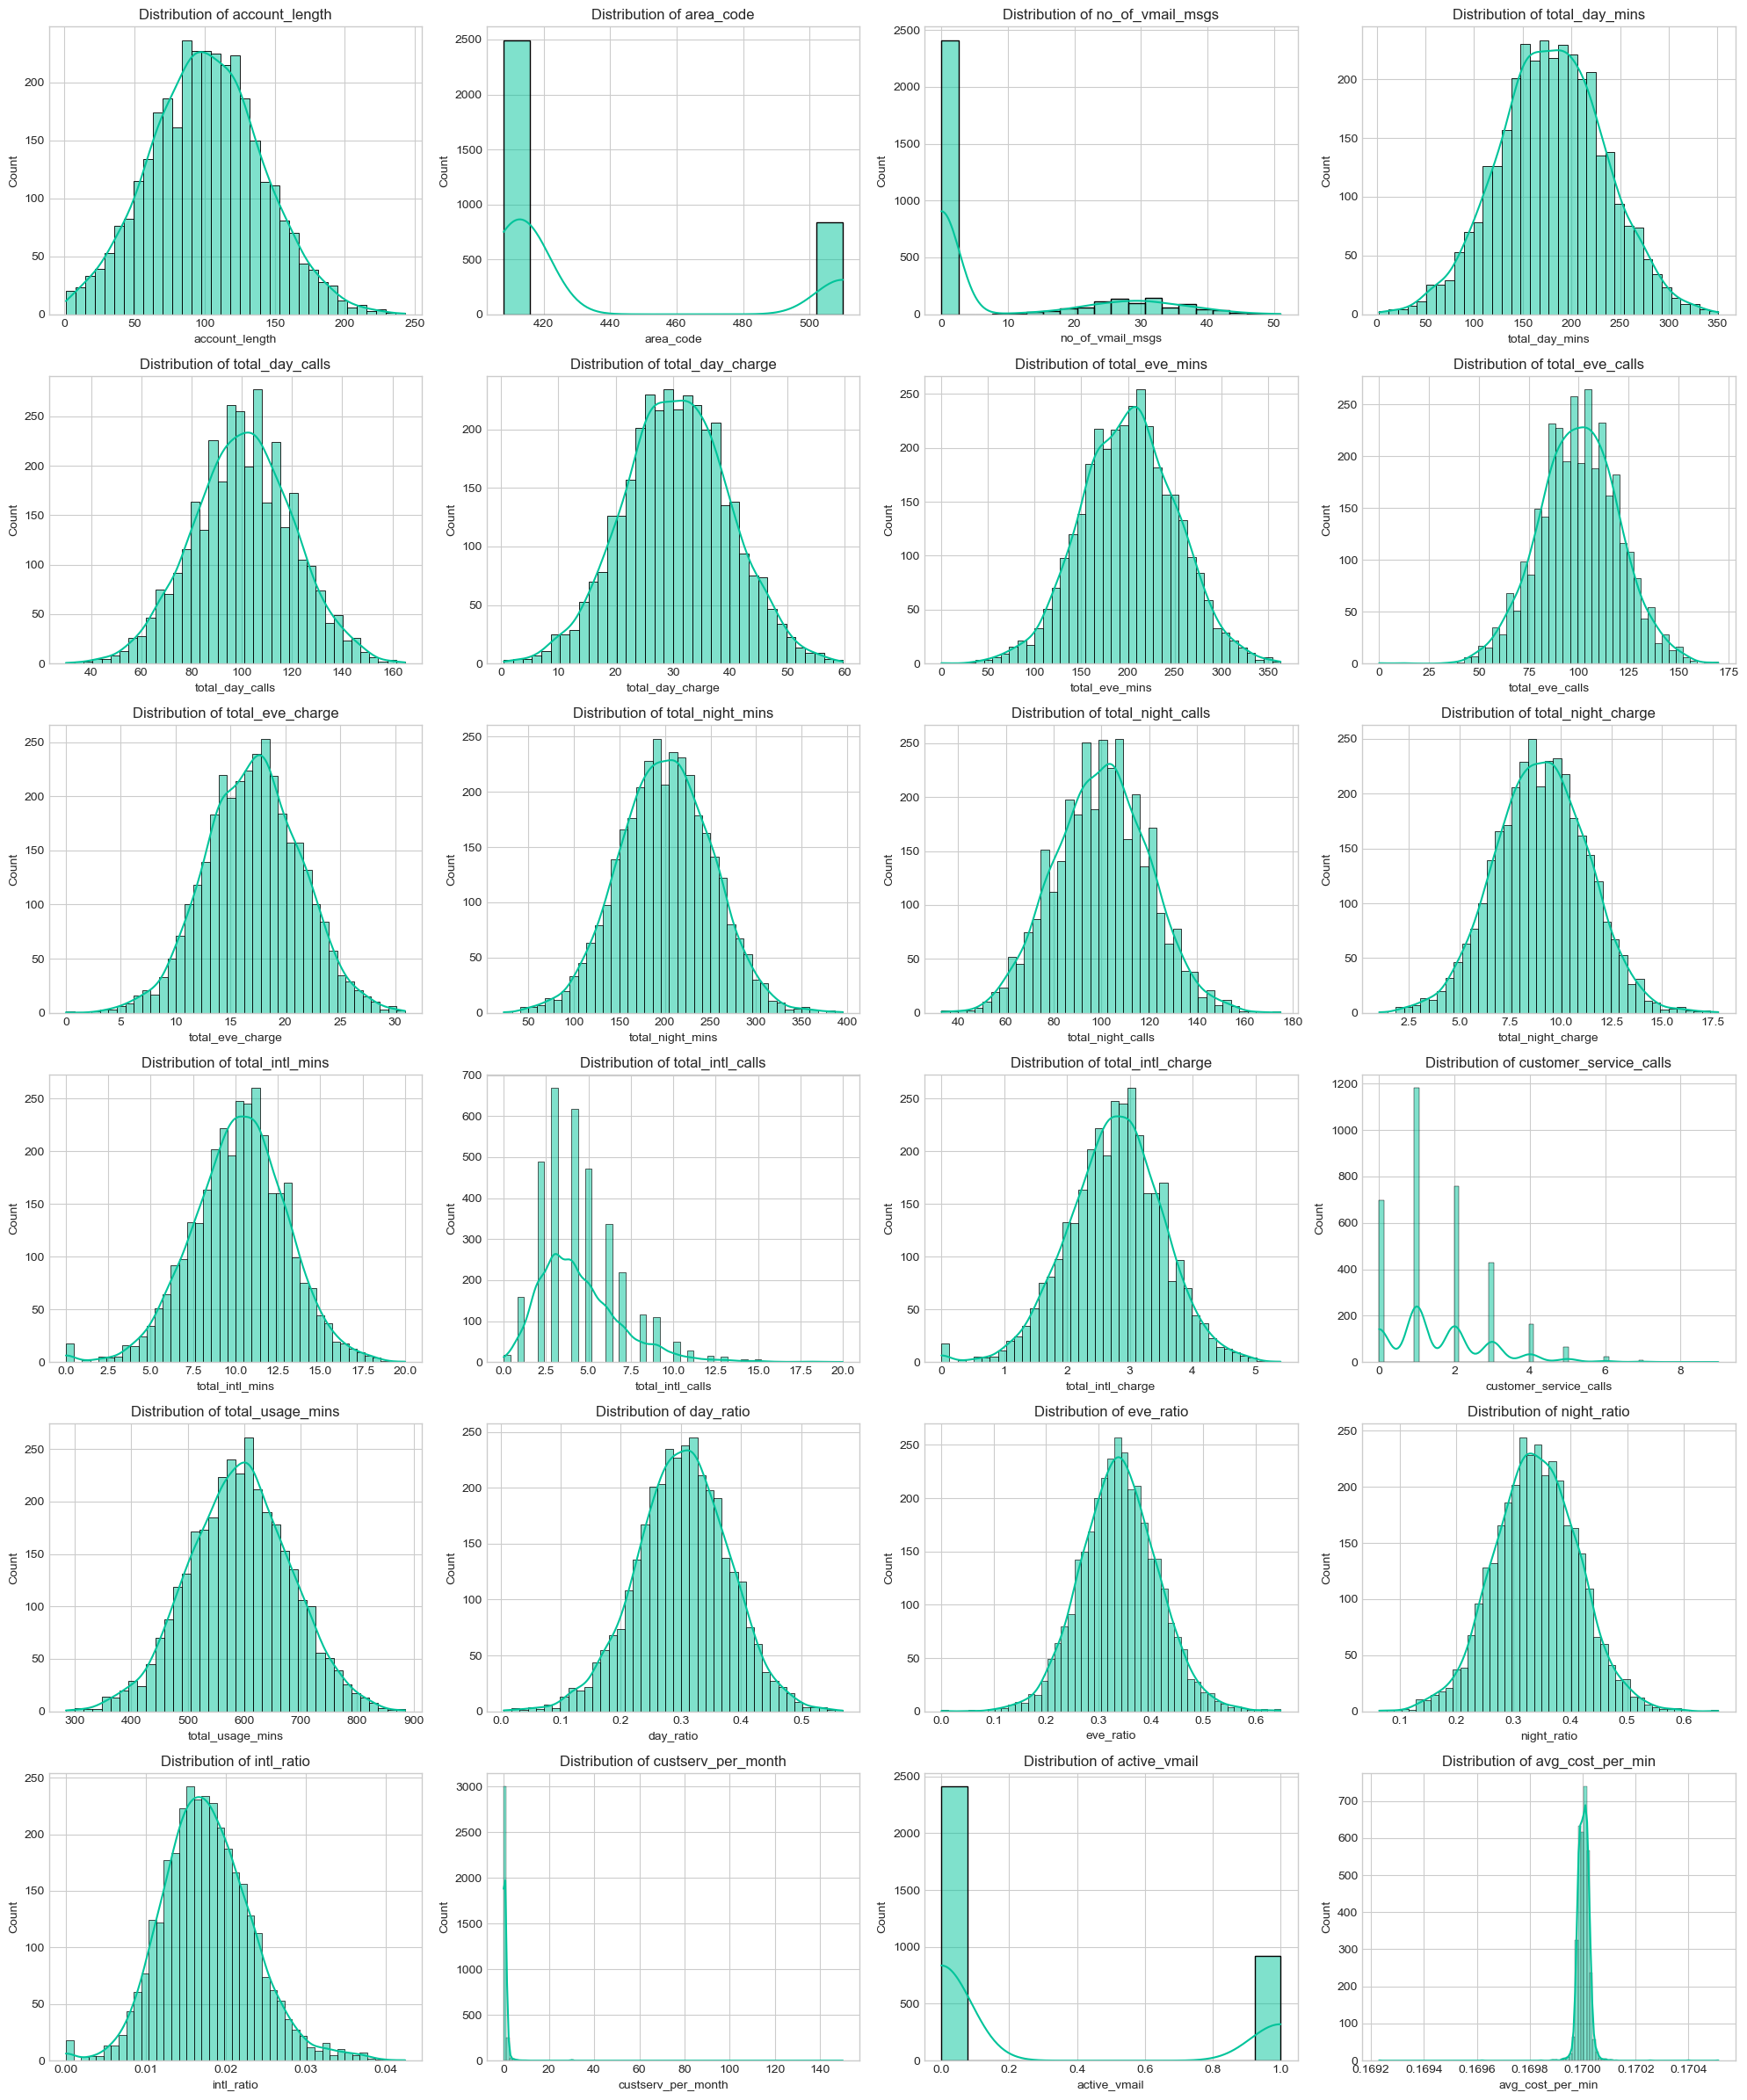

In [9]:
# Plot
numeric_cols = df_fe.select_dtypes(include=['int64', 'float64']).columns
n_cols = 4 
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_fe[col], kde=True, ax=axes[i], color='#00C49A')
    axes[i].set_title(f'Distribution of {col}')

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *Observation:*

- **Most usage-related variables** (day, evening, and night minutes/calls) display smooth, approximately bell-shaped distributions. Indicating that customer usage naturally centers around an average level, with fewer customers at the extremes. These variables show low skewness.
- **Voicemail messages** remain heavily right-skewed, showing that most customers rarely or never use voicemail. A smaller subgroup demonstrates much higher voicemail activity. Combined with the near-binary distribution of active_vmail, this reveals two distinct customer groups: voicemail users and non-users.
- **International usage** (both minutes and calls) is similarly strongly right-skewed, reinforcing that international calling is uncommon for most users. A small subset engages in high international activity, which may be important for behavioral segmentation or churn modeling.
- **Customer service calls** show a highly discrete, stepped distribution, with dense clusters at 0–3 calls and steep drop-offs afterward. This pattern reflects a small group of customers repeatedly contacting support, a likely indicator of dissatisfaction and a highly predictive churn feature.
- **Charge variables** (day, eve, night, international charges) mirror their corresponding minute distributions because they are linear transformations. This creates **redundancy and multicollinearity**, offering no additional information beyond the minute features.
- **Ratio variables** (day_ratio, eve_ratio, night_ratio, intl_ratio) are relatively symmetric, suggesting customers differ in how they distribute their usage across time periods without extreme outliers. These ratios may meaningful behavioral differences not evident from raw usage counts.
- **area_code** shows a few distinct spikes.
- **customer_per_month** exhibit discrete spikes and non-smooth distributions, reflecting diverse customer behavior patterns.
- **avg_cost_per_min** shows extremely low variance, suggesting the cost per minute is nearly constant across customers.
- The combined smoothness of core usage metrics (especially total_usage_mins) reflects strong internal correlation between day, evening, night, and international usage.

### 2. CATEGORICAL VARIABLES

#### Target Variable - Churn
First we map the boolean variables into integers for easier working down the line and then check how the distribution looks like

churn
0    2849
1     482
Name: count, dtype: int64

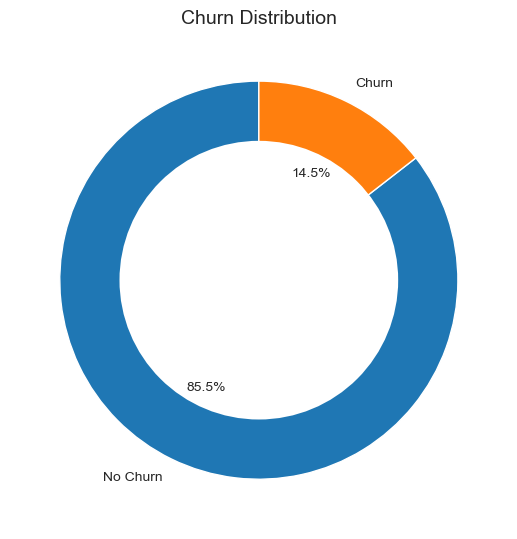

In [10]:
# Map churn boolean to integer
df_fe['churn'] = df_fe['churn'].map({False: 0, True: 1})

# Check distribution
churn_counts = df_fe['churn'].value_counts()
display(churn_counts)

# Palette
colors = ['#1F77B4', '#FF7F0E']   
 
fig, ax = plt.subplots(figsize=(5.5, 5.5))
wedges, texts, autotexts = ax.pie(
    churn_counts,
    labels=['No Churn', 'Churn'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Donut hole
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Churn Distribution', fontsize=14)
plt.tight_layout()
plt.show()

#### *Observation:*

- Most customers are staying with the company - roughly 85% retention.
- Only about 15% churn, which is relatively low.

#### Now we check state distribution

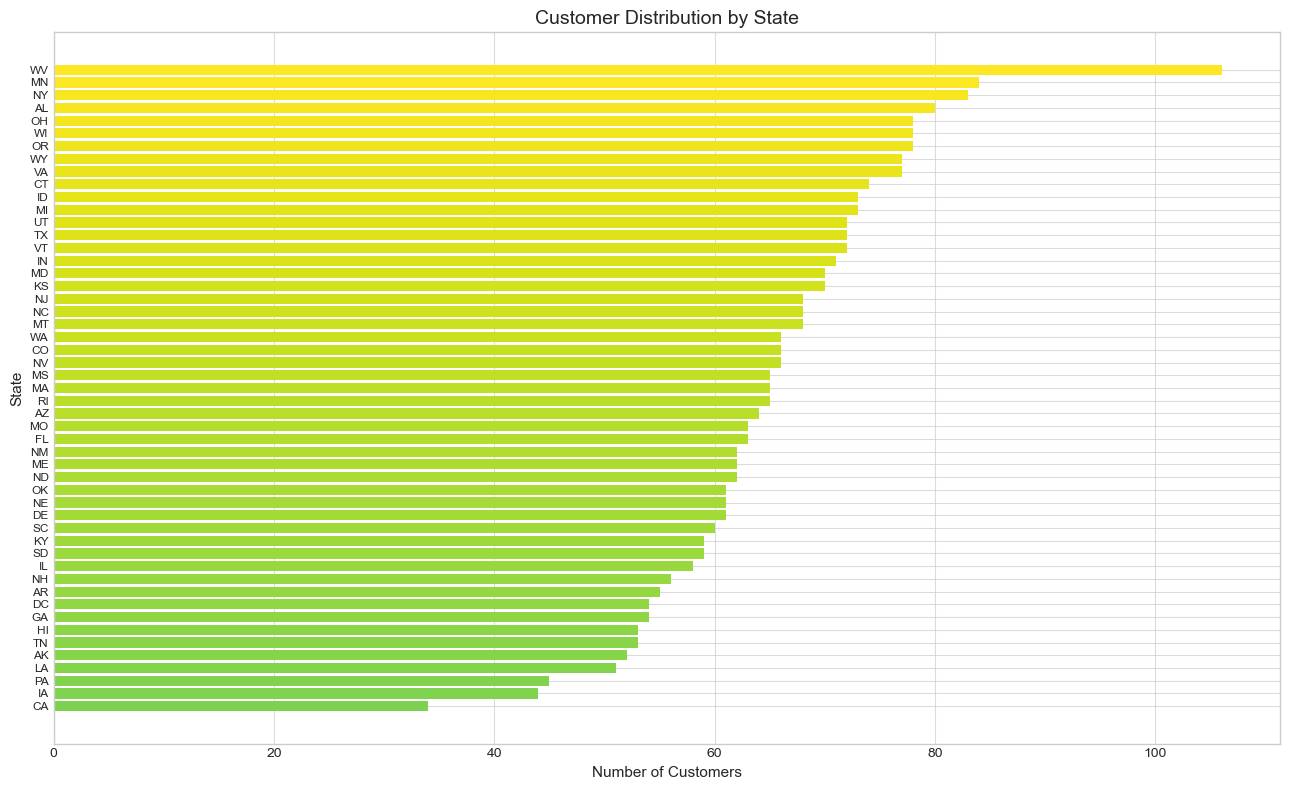

In [11]:
# Count customers per state
state_counts = df_fe['state'].value_counts()

# Plot as a horizontal bar chart 
plt.figure(figsize=(13, 8))
colors = plt.cm.viridis_r(range(len(state_counts))) 

bars = plt.barh(state_counts.index, state_counts.values, color=colors)

plt.xlabel('Number of Customers', fontsize=11)
plt.ylabel('State', fontsize=11)
plt.yticks(fontsize=8.5)
plt.title('Customer Distribution by State', fontsize=14)
plt.gca().invert_yaxis() 
plt.grid(axis='both', linestyle='-', alpha=0.7)
plt.tight_layout()
plt.show()

#### *Observation:*

- WV (West Virginia) has the highest number of customers, followed closely by MN (Minnesota) and NY (New York).
- CA (California) and IA (Iowa) are at the bottom, meaning very few customers there.
- The distribution is right-skewed: a few states dominate the customer base, while many states have moderate numbers.
- This suggests that the company’s market penetration is stronger in certain regions (like WV, MN, NY) and weaker in others.

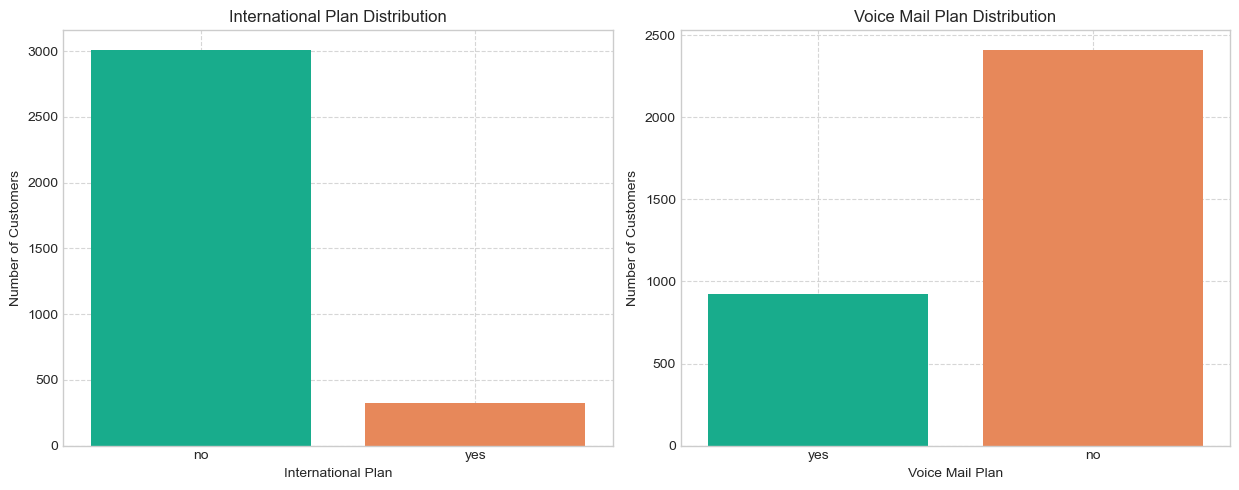

In [12]:
# Define color mapping
color_map = {'yes': '#00C49A', 'no': '#FF8042'}

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12.5, 5))

# International Plan
sns.countplot(
    x='intl_plan', 
    data=df_fe, 
    ax=axes[0], 
    palette=[color_map[x] for x in ['yes','no']]
)
axes[0].set_title('International Plan Distribution', fontsize=12)
axes[0].set_xlabel('International Plan', fontsize=10)
axes[0].set_ylabel('Number of Customers', fontsize=10)
axes[0].grid(True, which='both', axis='both', linestyle='--', alpha=0.8)

# Voice Mail Plan
sns.countplot(
    x='voicemail_plan', 
    data=df_fe, 
    ax=axes[1], 
    palette=[color_map[x] for x in ['yes','no']]
)
axes[1].set_title('Voice Mail Plan Distribution', fontsize=12)
axes[1].set_xlabel('Voice Mail Plan', fontsize=10)
axes[1].set_ylabel('Number of Customers', fontsize=10)
axes[1].grid(True, which='both', axis='both', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()

#### *Observation:*

- Most customers do not have an international plan. Only a small fraction of customers have opted for it, suggesting that international calling is either not frequently needed or is an optional premium feature for a minority of customers.
- Most customers do not have a voice mail plan, but there is a sizable group that does.
- Unlike the international plan, the distribution is more balanced, indicating voice mail is somewhat more popular, though still not universal.

In [13]:
# Map Yes/No to integers
df_fe['intl_plan'] = df_fe['intl_plan'].map({'yes': 1, 'no': 0}).astype(int)
df_fe['voicemail_plan'] = df_fe['voicemail_plan'].map({'yes': 1, 'no': 0}).astype(int)

## 2. BIVARIATE ANALYSIS

### Numerical Variables Vs Churn

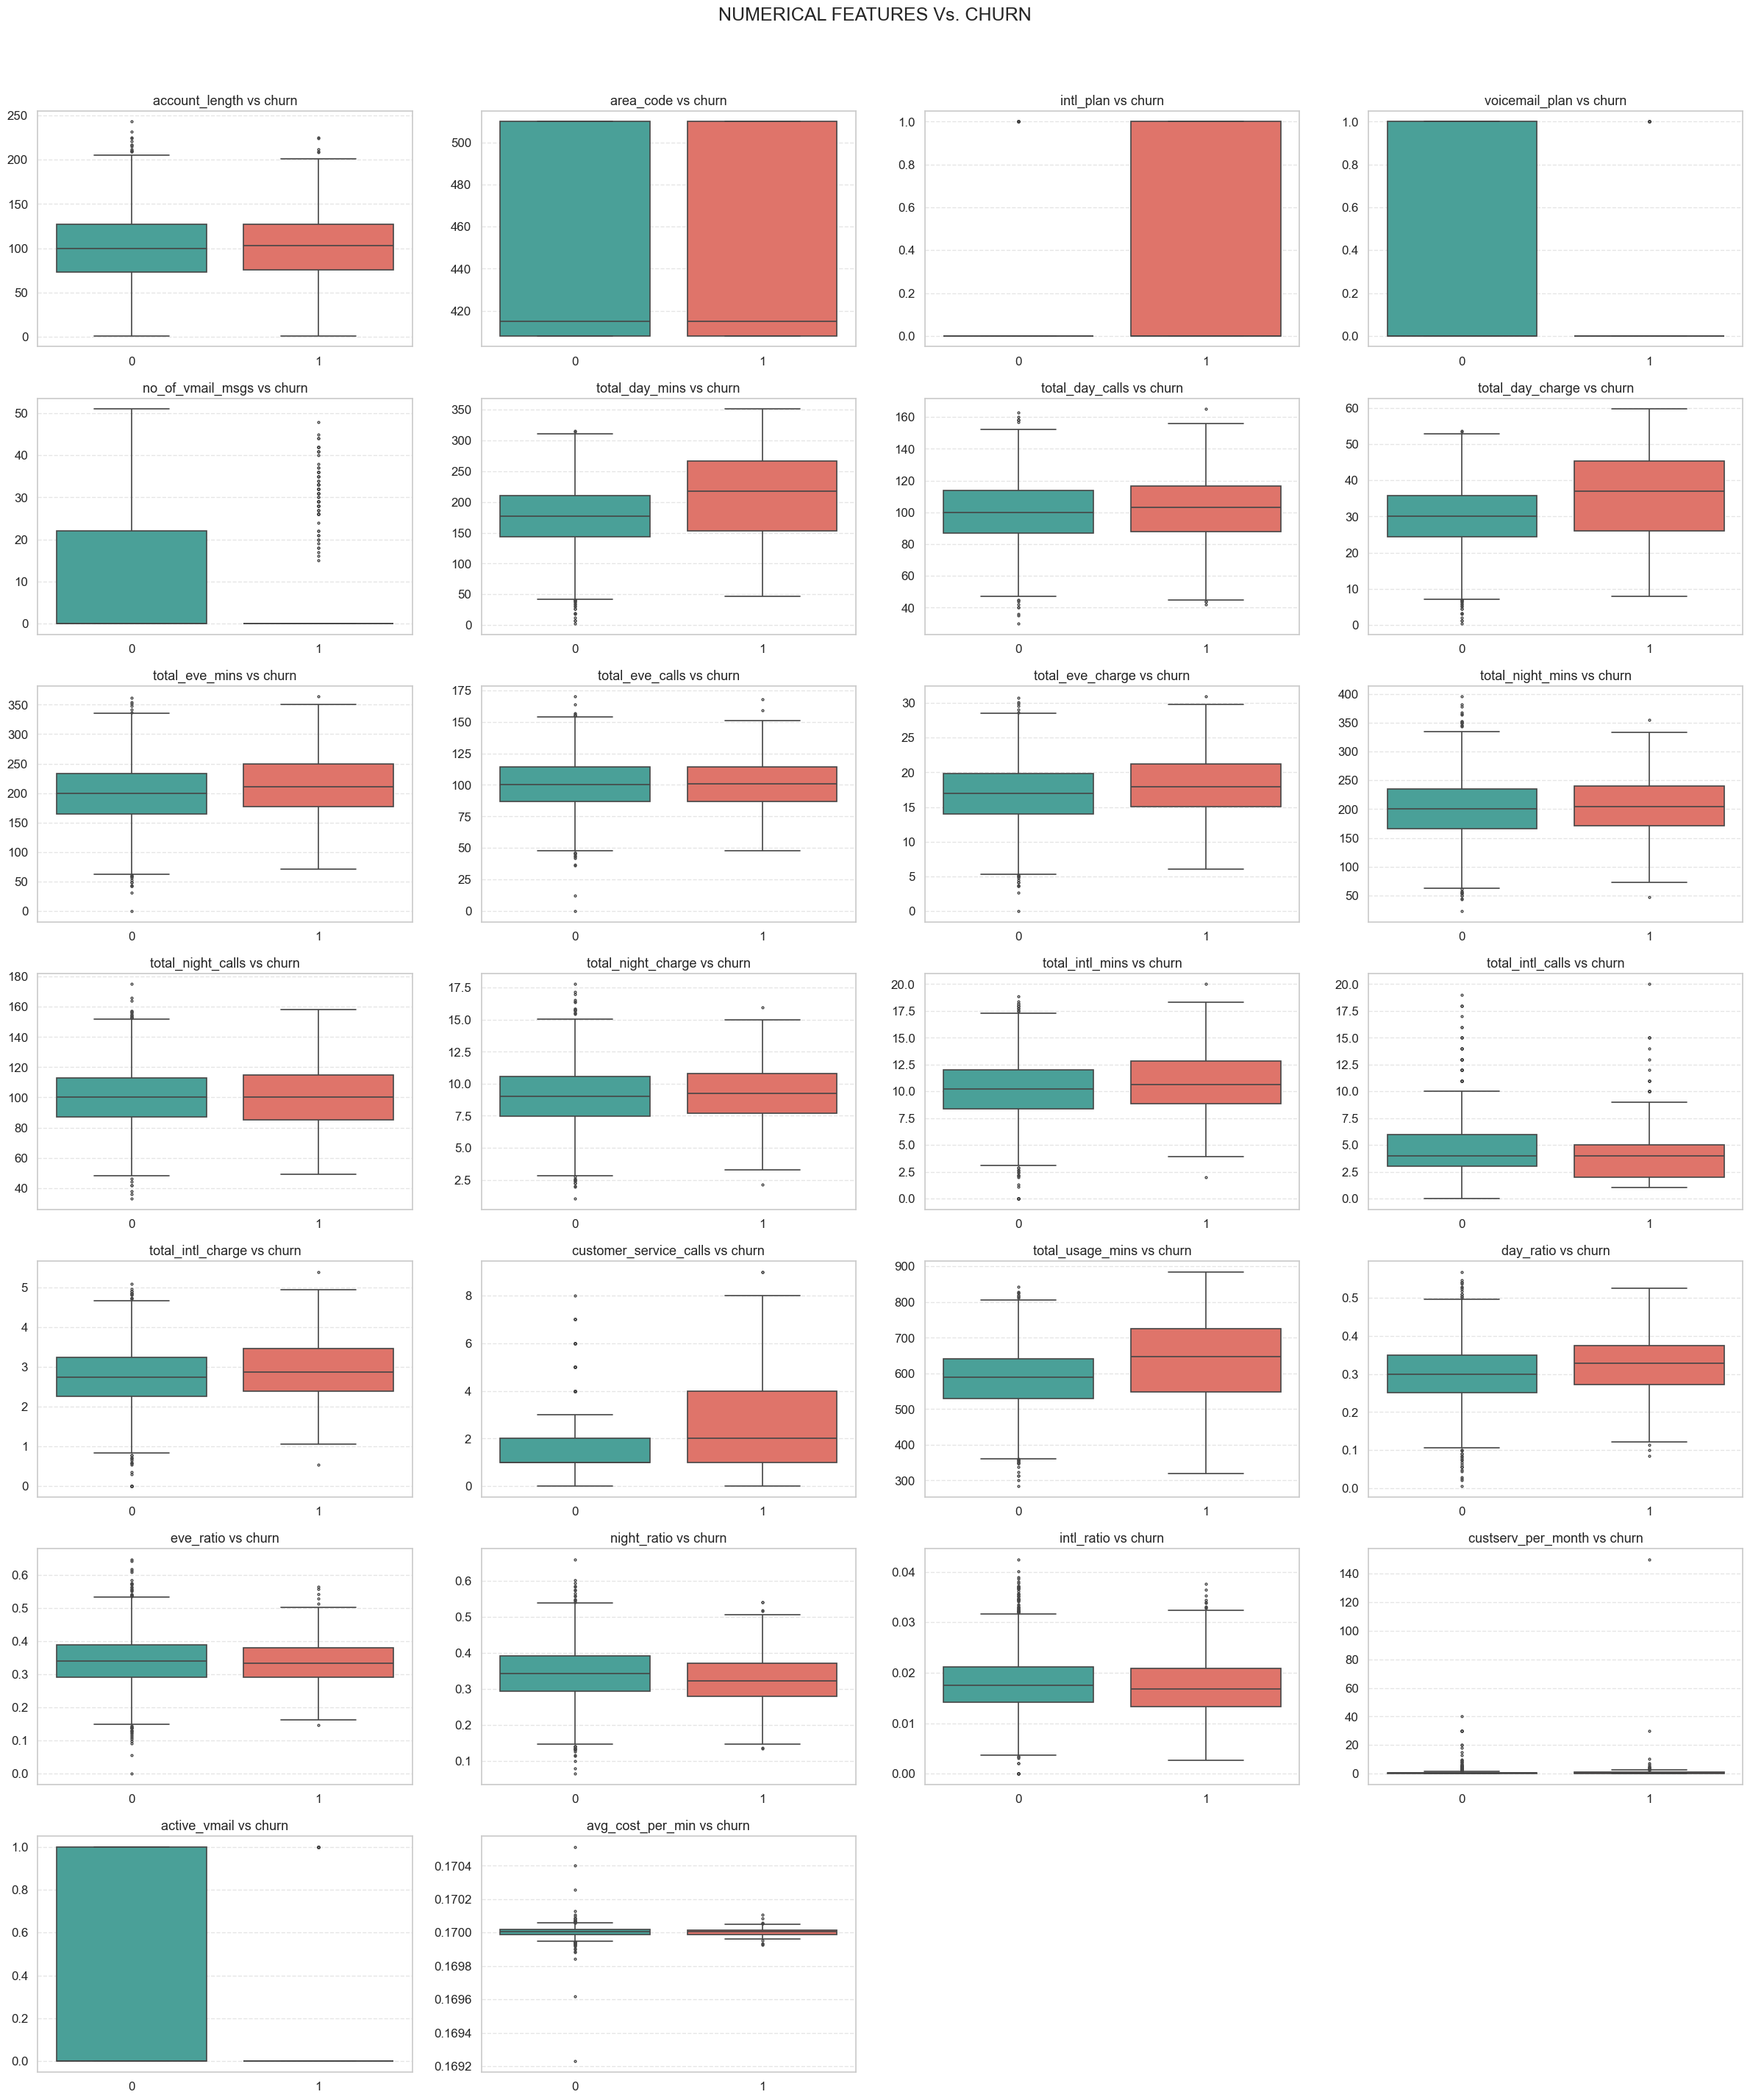

In [14]:
# Determine numerical variables
numerical_vars = df_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_vars.remove('churn')

# Set seaborn style
sns.set_theme(style="whitegrid", font_scale=1.1)

# Layout configuration
n_cols = 4
n_rows = (len(numerical_vars) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, n_rows * 4))
axes = axes.flatten()

# Palette
palette = ['#3CAEA3', '#F26457'] 

for i, var in enumerate(numerical_vars):
    sns.boxplot(
        x='churn',
        y=var,
        data=df_fe,
        ax=axes[i],
        palette=palette,
        linewidth=1.2,
        fliersize=2
    )
    
    axes[i].set_title(f"{var} vs churn", fontsize=13)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    # Show grid
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add global labels
fig.suptitle("NUMERICAL FEATURES Vs. CHURN", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

#### *Observation:*

- **Customer service calls** is the strongest churn indicator. Churners consistently have more support interactions, reflecting higher dissatisfaction or more unresolved issues.
- **Total day minutes and day charges** are noticeably higher for churners. This suggests that heavy daytime users may be more sensitive to pricing or bill amounts, contributing to their likelihood of leaving.
- **International minutes and charges** are slightly elevated among churners. Although the difference is modest, it implies that customers with more international activity might be more vulnerable to churn, potentially due to cost sensitivity or billing concerns.
- The **international plan** is somewhat more common among churners. While the degree of increase is small, it supports the idea that international usage patterns have some connection to churn behavior.
- **Voicemail plan** shows little to no meaningful difference between churners and non-churners. Having voicemail appears unrelated to churn.
- **Evening usage** (minutes, calls, charges) shows almost no separation between churn groups, indicating that evening behavior does not influence churn decisions.
- **Night usage** (minutes, calls, charges) similarly shows very small differences, suggesting that night-time activity is not a key churn driver.
- **Number of voicemail messages** does not differentiate churners from non-churners. Even among voicemail users, message volume does not predict churn.
- **Account length** appears almost identical between churners and non-churners, indicating that tenure with the company is not a strong standalone predictor.
- **Area code** shows no visible relationship with churn. Geographic assignment does not influence churn likelihood.
- **Ratios** show minimal differences between churn groups, meaning proportional usage distribution across the day does not strongly correlate with churn.
- **Aggregate metrics** like total_usage_mins are slightly higher among churners, reinforcing the pattern that churners generally use more and thus incur higher charges.
- **Average cost per minute** is nearly constant for all customers, offering no discriminative power.

##### **Overall Interpretation**

Churners tend to:
- **Contact customer service more frequently**  
- **Use more minutes—especially during the day**
- **Spend more on charges (day and international)**
- **Slightly more likely to have an international plan**

This pattern points toward **pricing dissatisfaction and customer support friction** as major churn drivers. Usage-heavy customers, especially those with international activity and repeated support interactions, are the most at-risk.

### Categorical Variables Vs Churn

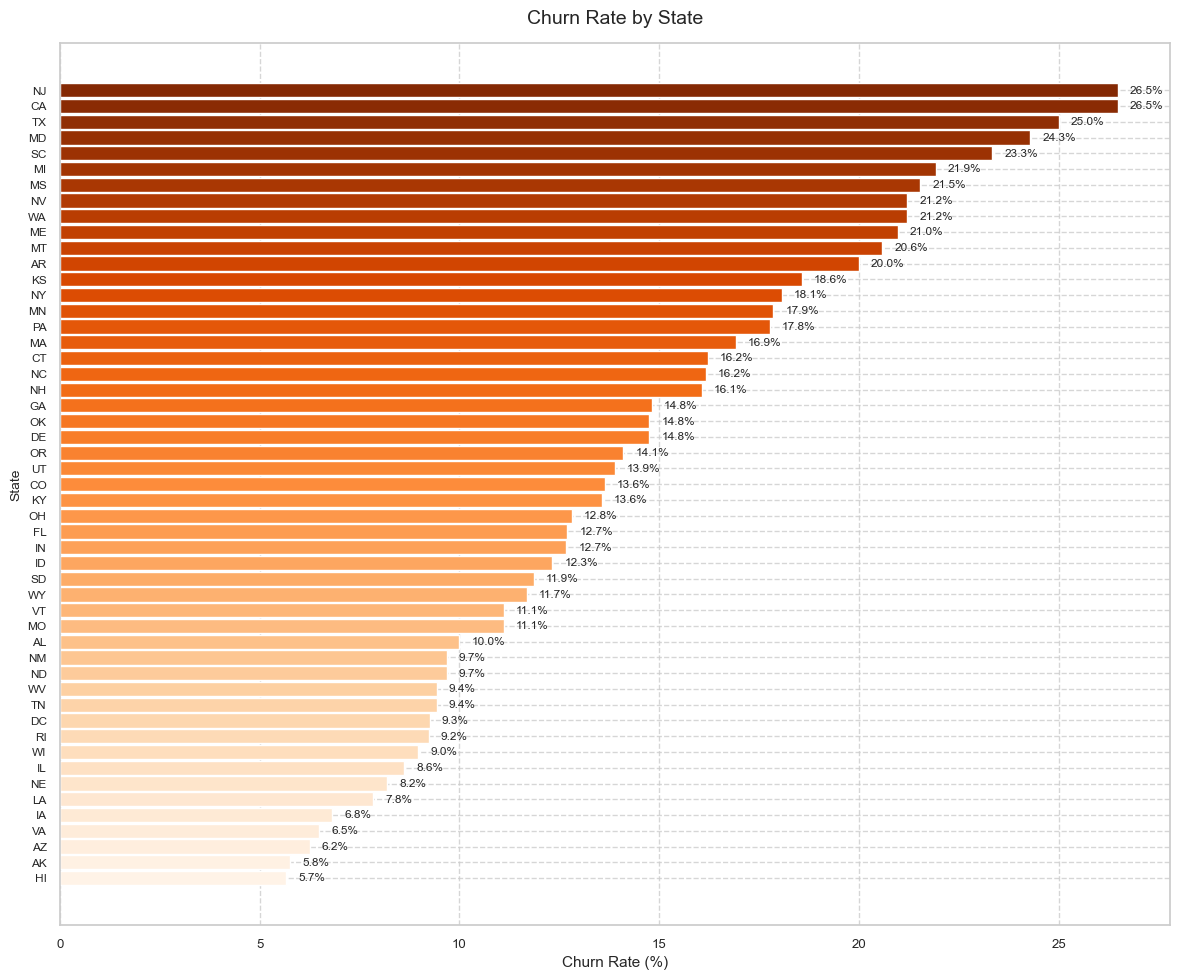

In [15]:
# Compute churn rate per state
state_churn = (
    df_fe.groupby('state')['churn']
        .mean()
        .sort_values() * 100
)

# Create figure
plt.figure(figsize=(12, 10))

# Palette
colors = sns.color_palette("Oranges", len(state_churn))

# Bar modifications
bars = plt.barh(
    state_churn.index,
    state_churn.values,
    color=colors,
    height=0.9  
)

# Labels
plt.xlabel("Churn Rate (%)", fontsize=11)
plt.ylabel("State", fontsize=10)
plt.xticks(fontsize=9.5)
plt.yticks(fontsize=8.5)
plt.title("Churn Rate by State", fontsize=14, pad=14)

# Annotate bar values
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.1f}%",
        va='center',
        fontsize=8.5
    )

plt.grid(axis='both', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

#### *Observation:*

- Highest-churn states include: New Jersey, California, Texas, Maryland, South Carolina and Michigan. These are typically large, urban, highly competitive markets, where customers have many options and higher service expectations.
- Lowest-churn states include: Hawaii, Alaska, Arizona, Virginia and Iowa. These states tend to be less competitive or more rural, where customer loyalty is stronger and switching providers is less common.
- A clear geographical pattern emerges: West Coast & Northeast → Higher churn; Midwest & Mountain states → Lower churn and Southern states → Mixed, but often mid-level churn

## 3. MULTIVARIATE ANALYSIS

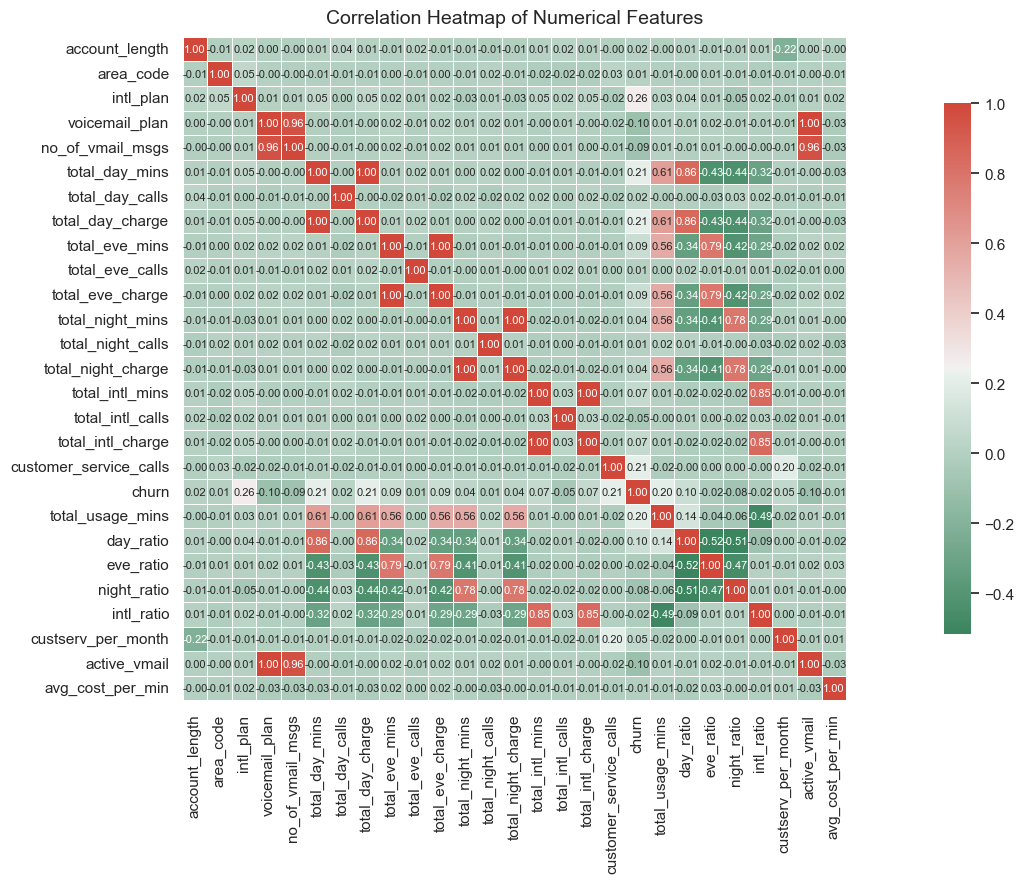

In [16]:
# Select only numerical columns
num_df = df_fe.select_dtypes(include=['int64', 'float64'])

# Compute correlations
corr = num_df.corr()

# Heatmap
plt.figure(figsize=(20, 9))
sns.set_theme(style="white", font_scale=1.0)
ax = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap=sns.diverging_palette(145, 15, as_cmap=True),
    square=True,
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14, pad=10)
plt.xticks(rotation=90, ha='center')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#### *Observation:*

- **Usage minutes and their corresponding charges are perfectly correlated.**  
  Pairs such as total_day_mins <-> total_day_charge, total_eve_mins <-> total_eve_charge, etc., show values near 1.0 because charges are direct formulas from minutes.  
  **These pairs are redundant, and only one of each is needed for modeling.**
- **Day, evening, and night minutes are strongly correlated with one another.**  
  Heavy users tend to use more across all time periods, not just one.  
  **-> These features capture overall usage level, contributing to multicollinearity.**
- **Ratios (day_ratio, eve_ratio, night_ratio) are strongly negatively correlated.**  
  Since ratios must add up to a fixed total, increasing one forces decreases in the others.  
  **-> Ratios provide behavioral patterns but are mathematically dependent.**
- **Customer service calls have very low correlation with all usage features.**  
  Support interactions are independent of how much a customer uses their service.  
  **-> This makes customer service calls a uniquely strong and non-redundant churn predictor.**
- **Churn has low correlation with nearly all numerical features.**  
  Only a few show modest relationships:  
  - Higher day minutes / day charges  
  - Slightly higher total usage  
  - More customer service calls  
  **-> Churn appears driven by dissatisfaction and cost sensitivity rather than raw usage levels.**

- **Administrative features such as account length, area code, voicemail plan, and voicemail messages show near-zero correlation with almost everything.**  
  **-> These features provide little predictive value.**
- **avg_cost_per_min is almost constant across the dataset.**  
  Its near-zero correlation with all variables indicates minimal variability.  
  **-> This feature can be safely removed.**
- **International plan has only tiny correlations with usage patterns.**  
  Customers with the international plan do not necessarily use more international minutes.  
  **-> The plan choice may be marketing-driven rather than behavior-driven.**

##### **Overall Summary**

The heatmap shows strong clustering among usage-related variables, heavy redundancy between minutes and charges, high dependency among ratio features, and a uniquely important role for customer service calls. Churn itself has weak linear correlations, suggesting that nonlinear models (e.g. tree-based) will capture churn behavior more effectively than linear ones.

## CONCLUSIONS AND RECOMMENDATIONS

### CONCLUSIONS

1. **International Plan is a major driver of churn:** Customers subscribed to an international calling plan show a significantly higher churn rate. This feature displays the strongest separation between churners and non-churners.
2. **Voicemail Plan users churn less:** Customers with a voicemail plan exhibit lower churn proportions, suggesting that voicemail subscribers are generally more satisfied or more engaged.
3. **Customer Service Calls strongly correlate with churn:** Higher numbers of customer service calls are associated with substantially higher churn. This indicates that repeated contact with support is a signal of dissatisfaction.
4. **High Daytime Usage is linked to increased churn:** Churners tend to have higher total day minutes and total day charges. High daytime usage may reflect dissatisfaction with pricing or plan fit.
5. **Evening and Night usage are weaker predictors:** Total evening and total night minutes do not show strong differences between churners and non-churners, making them weaker churn indicators.
6. **International usage contributes but with lower strength:** Total international minutes and calls show moderate differences between churn groups, but not as strong as international plan status or customer service calls.
7. **State-level churn differences exist but are not dominant:** While some states show higher churn rates, the variation is not large enough for state to be considered a primary churn driver.

### RECOMMENDATIONS

1. **Prioritize International Plan customers for retention:** Since churn is heavily concentrated among international plan users, this group should be the first target for retention interventions or plan redesign efforts.
2. **Strengthen customer service quality and first-call resolution:** High churn among customers with frequent service calls suggests unresolved issues. Improving support processes can directly reduce churn.
3. **Re-evaluate pricing and plan suitability for high daytime users:** Consider offering personalized packages, discounts, or more flexible options for heavy daytime callers, as this group is more prone to churn.
4. **Increase the value of Voicemail Plan adoption:** Because voicemail subscribers churn less, consider strategies such as bundling voicemail with other services or offering promotional access.
5. **Apply region-specific monitoring where needed:** While not a major churn driver, certain states show elevated churn. Localized campaigns or operational reviews may be beneficial.
6. **Focus model features around key churn drivers**  
   The most important variables for predictive modeling should include:  
   - Customer service call frequency  
   - International plan status  
   - Voicemail plan status  
   - Daytime usage metrics  
7. **Identify high-risk profiles early:** Customers with both high usage and high customer service interactions should be treated as a priority segment for proactive retention.

In [17]:
# Save data for modeling
df_fe.to_csv('../Data/modeling_data.csv', index=False)